In [1]:
# Load modules for numerical computation and plotting
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load pygimli and some submodules
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

In [3]:
# Create a protocol for synthetic modelling
scheme = ert.createData(elecs=np.arange(50.1), schemeName='dd')
print(scheme)

Data: Sensors: 51 data: 1176, nonzero entries: ['a', 'b', 'm', 'n', 'valid']


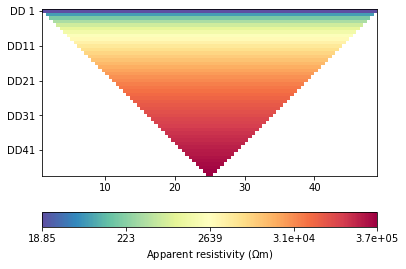

In [4]:
scheme["k"] = ert.geometricFactors(scheme)
pg.show(scheme, -scheme["k"], logScale=True);

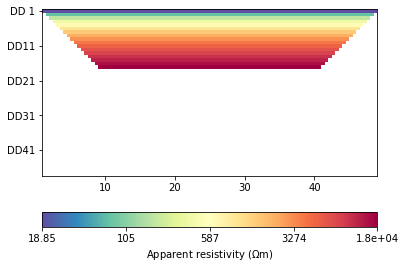

In [5]:
scheme.markInvalid(np.abs(scheme["k"]) > 20000)
pg.show(scheme, -scheme["k"]);

Data: Sensors: 51 data: 1176, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']
Data: Sensors: 51 data: 680, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'valid']


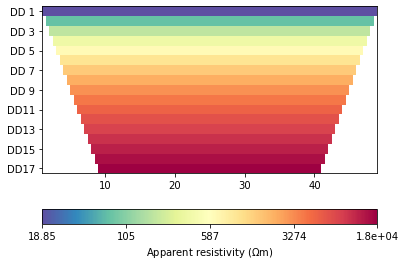

In [6]:
print(scheme)
scheme.removeInvalid()
print(scheme)
pg.show(scheme, -scheme["k"]);

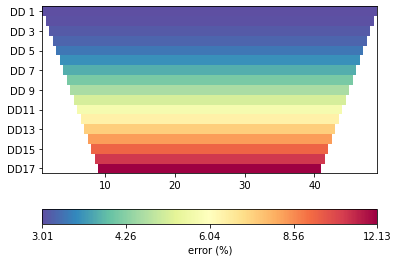

In [7]:
scheme["rhoa"] = pg.Vector(scheme.size(), 100.0)
scheme["err"] = ert.estimateError(scheme, relativeError=0.03, 
                  absoluteCurrent=200e-3, absoluteUError=100e-6)
pg.show(scheme, scheme["err"]*100, label="error (%)");

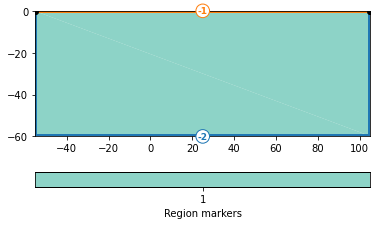

In [8]:
world = mt.createWorld(start=[-55, 0], end=[105, -60], worldMarker=True)
pg.show(world, markers=True);

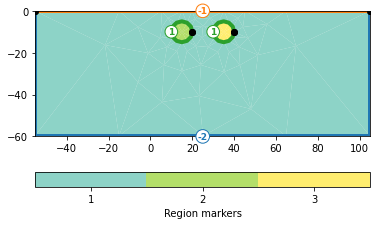

In [9]:
circle1 = mt.createCircle(pos=[15, -10], radius=5, marker=2)
circle2 = mt.createCircle(pos=[35, -10], radius=5, marker=3)
plc = world + circle1 + circle2
pg.show(plc, markers=True);

Mesh: Nodes: 915 Cells: 1583 Boundaries: 2497
Mesh: Nodes: 3412 Cells: 1583 Boundaries: 2497


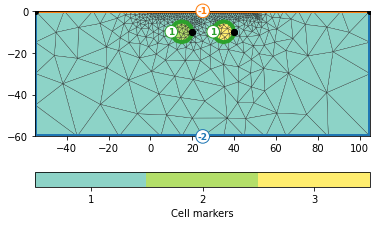

In [10]:
for s in scheme.sensors():
    plc.createNode(s)
    plc.createNode(s + [0.0, -0.2])

mesh1 = mt.createMesh(plc, quality=34)
print(mesh1)
pg.show(mesh1, markers=True, showMesh=True)
# additional refinements
mesh = mesh1.createP2()
print(mesh)

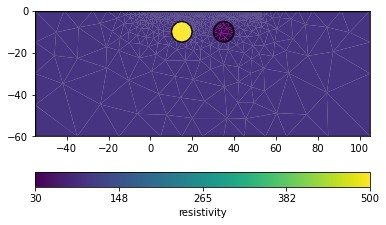

In [11]:
# Let's do some pure ERT modelling
rhomap = [[1, 100], [2, 500], [3, 30]]
pg.show(mesh, rhomap, label="resistivity");

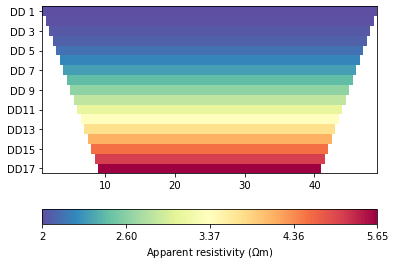

In [26]:
# Do some error estimation
scheme["err"] = ert.estimateError(scheme, relativeError=0.02, 
                                  absoluteUError=20e-6)
pg.show(scheme, scheme["err"]*100);

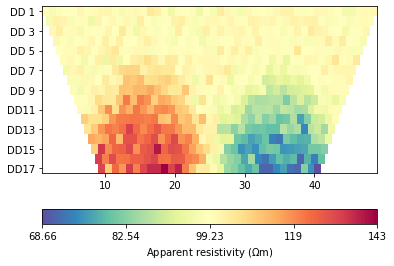

In [28]:
data = ert.simulate(mesh, scheme, res=rhomap, noiseLevel=1)
pg.show(data);

In [29]:
mgr = ert.ERTManager(data)
mgr.invert(quality=34.4)

26/11/21 - 19:14:57 - pyGIMLi - INFO - Found 2 regions.
26/11/21 - 19:14:57 - pyGIMLi - INFO - Region with smallest marker (1) set to background
26/11/21 - 19:14:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/11/21 - 19:14:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
26/11/21 - 19:14:57 - pyGIMLi - INFO - Use median(data values)=99.98008896804339
26/11/21 - 19:14:57 - pyGIMLi - INFO - Created startmodel from forward operator: 1116 [99.98008896804339,...,99.98008896804339]


1116 [99.39413135652156,...,60.58272847794011]

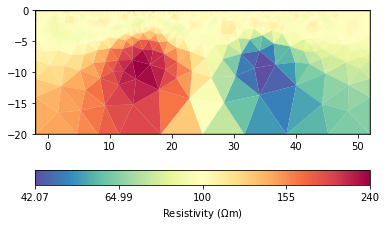

In [30]:
mgr.showResult();

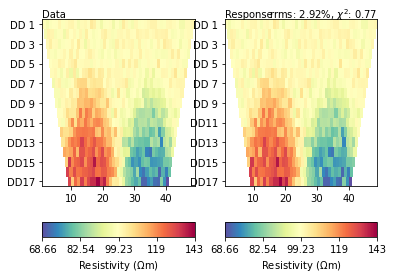

In [31]:
mgr.showFit();

In [32]:
rhomapC = [[1, 100+0j], [2, 500+0j], [3, 100+1j]]
data = ert.simulate(mesh, scheme, res=rhomapC)

26/11/21 - 19:15:08 - pyGIMLi - INFO - Complex resistivity values found.


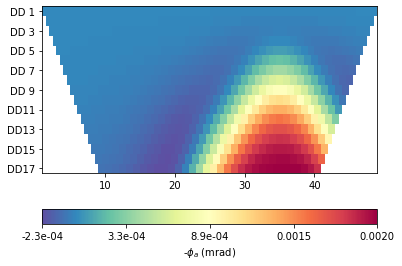

In [33]:
pg.show(data, "phia", label=r"-$\phi_a$ (mrad)");